#Method 1

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
batch_size = 128
n_classes = 10 # MNIST total classes (0-9 digits)

In [0]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, n_classes])

In [0]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def maxpool2d(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [0]:
def convolutional_neural_network(x):#, keep_rate):
    weights = {
        # 5 x 5 convolution, 1 input image, 32 outputs
        'W_conv1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
        # 5x5 conv, 32 inputs, 64 outputs 
        'W_conv2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
        # fully connected, 7*7*64 inputs, 1024 outputs
        'W_fc': tf.Variable(tf.random_normal([7*7*64, 1024])),
        # 1024 inputs, 10 outputs (class prediction)
        'out': tf.Variable(tf.random_normal([1024, n_classes]))
    }

    biases = {
        'b_conv1': tf.Variable(tf.random_normal([32])),
        'b_conv2': tf.Variable(tf.random_normal([64])),
        'b_fc': tf.Variable(tf.random_normal([1024])),
        'out': tf.Variable(tf.random_normal([n_classes]))
    }
    # Reshape input to a 4D tensor 
    x = tf.reshape(x, shape=[-1, 28, 28, 1])
    # Convolution Layer, using our function
    conv1 = tf.nn.relu(conv2d(x, weights['W_conv1']) + biases['b_conv1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1)
    # Convolution Layer
    conv2 = tf.nn.relu(conv2d(conv1, weights['W_conv2']) + biases['b_conv2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2)
     # Fully connected layer
    # Reshape conv2 output to fit fully connected layer
    fc = tf.reshape(conv2, [-1, 7*7*64])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc']) + biases['b_fc'])
    output = tf.matmul(fc, weights['out']) + biases['out']
    return output

In [0]:
def train_neural_network(x):
    prediction = convolutional_neural_network(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))

In [0]:
train_neural_network(x)

Epoch 0 completed out of 10 loss: 959446.9084968567
Epoch 1 completed out of 10 loss: 202641.69932937622
Epoch 2 completed out of 10 loss: 121777.24138259888
Epoch 3 completed out of 10 loss: 83071.93723592442
Epoch 4 completed out of 10 loss: 56830.20201873779
Epoch 5 completed out of 10 loss: 42930.29021835327
Epoch 6 completed out of 10 loss: 30774.018712235906
Epoch 7 completed out of 10 loss: 23916.525373458862
Epoch 8 completed out of 10 loss: 20920.562118929694
Epoch 9 completed out of 10 loss: 16029.618285179138
Accuracy: 0.973


#Method 2

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [0]:
# Placeholder variable for the input images
x = tf.placeholder(tf.float32, shape=[None, 28*28], name='X')
# Reshape it into [num_images, img_height, img_width, num_channels]
x_image = tf.reshape(x, [-1, 28, 28, 1])

# Placeholder variable for the true labels associated with the images
y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_true')
y_true_cls = tf.argmax(y_true, axis=1)

In [0]:
def new_conv_layer(input, num_input_channels, filter_size, num_filters, name):
    
    with tf.variable_scope(name) as scope:
        # Shape of the filter-weights for the convolution
        shape = [filter_size, filter_size, num_input_channels, num_filters]

        # Create new weights (filters) with the given shape
        weights = tf.Variable(tf.truncated_normal(shape, stddev=0.05))

        # Create new biases, one for each filter
        biases = tf.Variable(tf.constant(0.05, shape=[num_filters]))

        # TensorFlow operation for convolution
        layer = tf.nn.conv2d(input=input, filter=weights, strides=[1, 1, 1, 1], padding='SAME')

        # Add the biases to the results of the convolution.
        layer += biases
        
        return layer, weights

      
def new_pool_layer(input, name):
    
    with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
        layer = tf.nn.max_pool(value=input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        return layer
      
def new_relu_layer(input, name):
    
    with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
        layer = tf.nn.relu(input)
        return layer
      
def new_fc_layer(input, num_inputs, num_outputs, name):
    
    with tf.variable_scope(name) as scope:

        # Create new weights and biases.
        weights = tf.Variable(tf.truncated_normal([num_inputs, num_outputs], stddev=0.05))
        biases = tf.Variable(tf.constant(0.05, shape=[num_outputs]))
        
        # Multiply the input and weights, and then add the bias-values.
        layer = tf.matmul(input, weights) + biases
        
        return layer


In [0]:
# Convolutional Layer 1
layer_conv1, weights_conv1 = new_conv_layer(input=x_image, num_input_channels=1, filter_size=5, num_filters=6, name ="conv1")

# Pooling Layer 1
layer_pool1 = new_pool_layer(layer_conv1, name="pool1")

# RelU layer 1
layer_relu1 = new_relu_layer(layer_pool1, name="relu1")

# Convolutional Layer 2
layer_conv2, weights_conv2 = new_conv_layer(input=layer_relu1, num_input_channels=6, filter_size=5, num_filters=16, name= "conv2")

# Pooling Layer 2
layer_pool2 = new_pool_layer(layer_conv2, name="pool2")

# RelU layer 2
layer_relu2 = new_relu_layer(layer_pool2, name="relu2")

# Flatten Layer
num_features = layer_relu2.get_shape()[1:4].num_elements()
layer_flat = tf.reshape(layer_relu2, [-1, num_features])

# Fully-Connected Layer 1
layer_fc1 = new_fc_layer(layer_flat, num_inputs=num_features, num_outputs=128, name="fc1")

# RelU layer 3
layer_relu3 = new_relu_layer(layer_fc1, name="relu3")

# Fully-Connected Layer 2
layer_fc2 = new_fc_layer(input=layer_relu3, num_inputs=128, num_outputs=10, name="fc2")

In [0]:
# Use Softmax function to normalize the output
with tf.variable_scope("Softmax"):
    y_pred = tf.nn.softmax(layer_fc2)
    y_pred_cls = tf.argmax(y_pred, dimension=1)

In [0]:
# Use Cross entropy cost function
with tf.name_scope("cross_ent"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2, labels=y_true)
    cost = tf.reduce_mean(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# Use Adam Optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [0]:
# Accuracy
with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(y_pred_cls, y_true_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
# Initialize the FileWriter
writer = tf.summary.FileWriter("Training_FileWriter/")
writer1 = tf.summary.FileWriter("Validation_FileWriter/")

# Add the cost and accuracy to summary
tf.summary.scalar('loss', cost)
tf.summary.scalar('accuracy', accuracy)

# Merge all summaries together
merged_summary = tf.summary.merge_all()

In [0]:
num_epochs = 10
batch_size = 100
with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    
    # Add the model graph to TensorBoard
    writer.add_graph(sess.graph)
    
    # Loop over number of epochs
    for epoch in range(num_epochs):
        
        start_time = time.time()
        train_accuracy = 0
        
        for batch in range(0, int(len(data.train.labels)/batch_size)):
            
            # Get a batch of images and labels
            x_batch, y_true_batch = data.train.next_batch(batch_size)
            
            # Put the batch into a dict with the proper names for placeholder variables
            feed_dict_train = {x: x_batch, y_true: y_true_batch}
            
            # Run the optimizer using this batch of training data.
            sess.run(optimizer, feed_dict=feed_dict_train)
            
            # Calculate the accuracy on the batch of training data
            train_accuracy += sess.run(accuracy, feed_dict=feed_dict_train)
            
            # Generate summary with the current batch of data and write to file
            summ = sess.run(merged_summary, feed_dict=feed_dict_train)
            writer.add_summary(summ, epoch*int(len(data.train.labels)/batch_size) + batch)
        
          
        train_accuracy /= int(len(data.train.labels)/batch_size)
        
        # Generate summary and validate the model on the entire validation set
        summ, vali_accuracy = sess.run([merged_summary, accuracy], feed_dict={x:data.validation.images, y_true:data.validation.labels})
        writer1.add_summary(summ, epoch)
        

        end_time = time.time()
        
        print("Epoch "+str(epoch+1)+" completed : Time usage "+str(int(end_time-start_time))+" seconds")
        print("\tAccuracy:")
        print ("\t- Training Accuracy:\t{}".format(train_accuracy))
        print ("\t- Validation Accuracy:\t{}".format(vali_accuracy))

Epoch 1 completed : Time usage 101 seconds
	Accuracy:
	- Training Accuracy:	0.7357454537871209
	- Validation Accuracy:	0.8939999938011169
Epoch 2 completed : Time usage 101 seconds
	Accuracy:
	- Training Accuracy:	0.9063636380975897
	- Validation Accuracy:	0.9259999990463257
Epoch 3 completed : Time usage 101 seconds
	Accuracy:
	- Training Accuracy:	0.9283818191831762
	- Validation Accuracy:	0.9391999840736389
Epoch 4 completed : Time usage 100 seconds
	Accuracy:
	- Training Accuracy:	0.9402909100055694
	- Validation Accuracy:	0.9531999826431274
Epoch 5 completed : Time usage 101 seconds
	Accuracy:
	- Training Accuracy:	0.9491636380282316
	- Validation Accuracy:	0.9589999914169312
Epoch 6 completed : Time usage 101 seconds
	Accuracy:
	- Training Accuracy:	0.9561272765289653
	- Validation Accuracy:	0.9624000191688538
Epoch 7 completed : Time usage 100 seconds
	Accuracy:
	- Training Accuracy:	0.9611454569209705
	- Validation Accuracy:	0.9667999744415283
Epoch 8 completed : Time usage 101

#Method 3

In [0]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" #for training on gpu

In [0]:
data = input_data.read_data_sets('data/fashion',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [0]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=data.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=data.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=data.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=data.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [0]:
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

Text(0.5, 1.0, '(Label: Sneaker)')

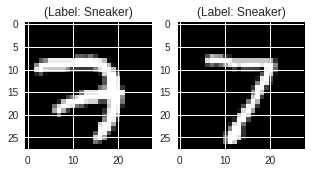

In [0]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(data.train.images[0], (28,28))
curr_lbl = np.argmax(data.train.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(data.test.images[0], (28,28))
curr_lbl = np.argmax(data.test.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

In [0]:
data.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
# Reshape training and testing image
train_X = data.train.images.reshape(-1, 28, 28, 1)
test_X = data.test.images.reshape(-1,28,28,1)

In [0]:
train_X.shape, test_X.shape

((55000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
train_y = data.train.labels
test_y = data.test.labels
train_y.shape, test_y.shape

((55000, 10), (10000, 10))

In [0]:
training_iters = 200 
learning_rate = 0.001 
batch_size = 128

In [0]:
# MNIST data input (img shape: 28*28)
n_input = 28

# MNIST total classes (0-9 digits)
n_classes = 10

#both placeholders are of type float
x = tf.placeholder("float", [None, 28,28,1])
y = tf.placeholder("float", [None, n_classes])

In [0]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) 

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

In [0]:
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
def conv_net(x, weights, biases):  

    # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix.
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4.
    conv3 = maxpool2d(conv3, k=2)


    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [0]:
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# Initializing the variables
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,y: batch_y})
        print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Calculate accuracy for all 10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
    summary_writer.close()